In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from process_conllu import ConlluProcessor
from functions import plot_hist

In [2]:
word_count_dict, sentence_lengths = ConlluProcessor.process_conllu_for_inspection("ptb-train.conllu")
word_count_df = pd.DataFrame.from_dict(word_count_dict, orient="index", columns=["count"])

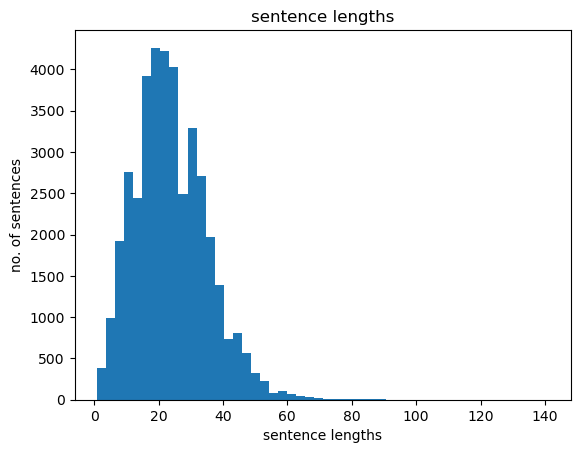

In [4]:
plot_hist(sentence_lengths, 50, False, "sentence lengths", "sentence lengths", "no. of sentences")

In [5]:
smallest_float = 1e-323
print(np.log(smallest_float))

-743.7469247408213


Experiments demonstrated that sequence length above 70 for a vocabulary size of 4k+ have a good chance to drop probability to zero before the end of sequence

In [4]:
# n_sentences longer than 70
np.count_nonzero(np.array(sentence_lengths) >= 70)

61

In [4]:
# n_sentences 1 or 2 words
np.count_nonzero(np.array(sentence_lengths) <= 2)

202

In [12]:
word_count_df.sort_values(by="count", inplace=True, ascending=False)
word_count_df.head(20)

,count
",",48723
the,47976
.,39020
[NUM],23927
of,23005
to,22352
a,20149
in,16931
and,16668
's,9326


In [13]:
word_count_df.tail(20)

,count
differentiate,1
higher-profit,1
crawfordsville,1
[NUM]-million-ton-a-year,1
self-portrait,1
high-profit,1
management-research,1
calmness,1
viewer,1
crew-rest,1


In [14]:
n_words_with_count = Counter(word_count_df["count"])
proportion_words_with_count = np.zeros(len(n_words_with_count))
for i, (count, n_words) in enumerate(n_words_with_count.items()):
    proportion_words_with_count[i] = count * n_words
proportion_words_with_count = proportion_words_with_count / np.sum(proportion_words_with_count)
cumulative_proportion = np.cumsum(proportion_words_with_count[::-1])
cumulative_words = np.cumsum(list(n_words_with_count.values())[::-1])

In [15]:
f = open("results/count_proportion.csv", "w")
f.write("count,cumulative proportion,cumulative unique words\n")
for count, proportion, n_words in zip(
        list(n_words_with_count.keys())[::-1],
        cumulative_proportion,
        cumulative_words):
    f.write(f"{count}, {proportion.item()}, {n_words}\n")
f.close()

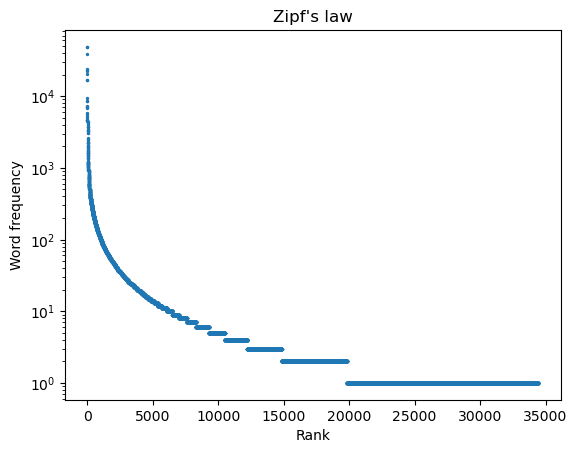

In [17]:
fig, ax = plt.subplots()
# s = marker size
ax.scatter(np.arange(1, len(word_count_df) + 1), word_count_df["count"], s=2)
ax.set_yscale("log")
ax.set_title("Zipf's law")
ax.set_ylabel("Word frequency")
ax.set_xlabel("Rank")
plt.show()